# **IMPORTING NECESSARY LIBRARIES**

---



In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.impute import SimpleImputer
from scipy import stats
import joblib
from sklearn.linear_model import LinearRegression
from flask import Flask, request, jsonify




# **LOADING THE DATASET**

---



In [2]:
df = pd.read_csv(r"/content/products_campaign_sales.csv")
df

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529
...,...,...,...,...,...,...,...,...,...,...,...
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285


# **PERFORMING EXPLORATORY DATA ANALYSIS**

---



In [3]:
df.shape

(731, 11)

In [4]:

df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [5]:
df.columns

Index(['limit_infor', 'campaign_type', 'campaign_level', 'product_level',
       'resource_amount', 'email_rate', 'price', 'discount_rate',
       'hour_resouces', 'campaign_fee', 'orders'],
      dtype='object')

## **CHECKING FOR NULL VALUES**

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [7]:
df.isnull().sum()

,0
limit_infor,0
campaign_type,0
campaign_level,0
product_level,0
resource_amount,0
email_rate,0
price,2
discount_rate,0
hour_resouces,0
campaign_fee,0


## **USING IQR METHOD TO DETERMINE & REMOVE OUTLIERS**

---



In [8]:
Q1 = df['campaign_fee'].quantile(0.25)
Q3 = df['campaign_fee'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['campaign_fee'] < lower_bound) | (df['campaign_fee'] > upper_bound)]

# Print or access the values of outliers
print("Outlier values:")
print(outliers['campaign_fee'].values)


Outlier values:
[33380]


In [9]:
df.iloc[632:639]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
632,0,3,1,1,7,0.67,168.0,0.86,1074,6506,7580
633,0,4,1,1,7,0.65,142.0,0.84,812,33380,4792
634,0,0,0,1,7,0.67,160.0,0.75,2006,3296,6302
635,0,4,1,1,7,0.65,152.0,0.86,1338,6267,7605
636,0,3,1,1,7,0.69,174.0,0.85,784,3845,4629
637,0,2,1,2,7,0.66,167.0,0.85,954,5336,6290
638,0,1,1,2,7,0.66,159.0,0.79,1017,5647,6664


### ***We have the outlier at 633 row.***

------







In [10]:
#dropping the 633 row with the outlier
df.drop(633, axis=0, inplace=True)


In [11]:
#checking in the dataframe if the row is dropped
df.iloc[632:639]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
632,0,3,1,1,7,0.67,168.0,0.86,1074,6506,7580
634,0,0,0,1,7,0.67,160.0,0.75,2006,3296,6302
635,0,4,1,1,7,0.65,152.0,0.86,1338,6267,7605
636,0,3,1,1,7,0.69,174.0,0.85,784,3845,4629
637,0,2,1,2,7,0.66,167.0,0.85,954,5336,6290
638,0,1,1,2,7,0.66,159.0,0.79,1017,5647,6664
639,0,1,1,1,7,0.66,155.0,0.86,1207,5676,6883


In [12]:
# Drop rows with missing values
new_df=df.dropna()


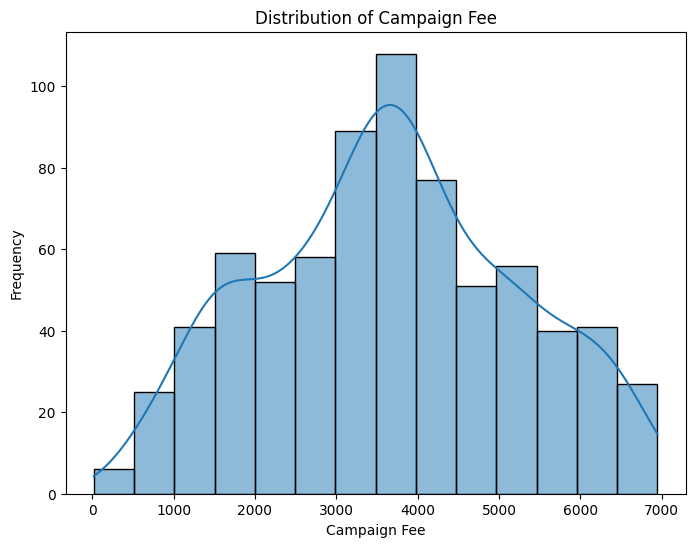

In [13]:
# Univariate Analysis
# Example: Histogram of 'campaign_fee'
plt.figure(figsize=(8, 6))
sns.histplot(df['campaign_fee'], kde=True)
plt.title('Distribution of Campaign Fee')
plt.xlabel('Campaign Fee')
plt.ylabel('Frequency')
plt.show()

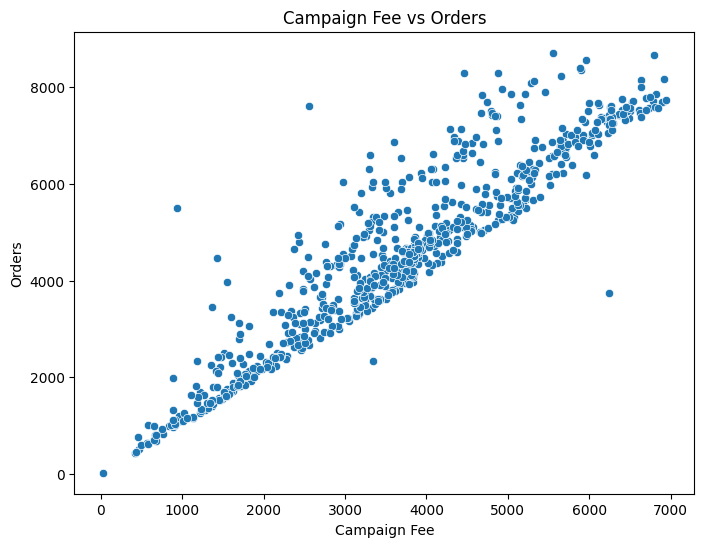

In [14]:
# Bivariate Analysis
# Example: Scatter plot of 'campaign_fee' vs 'sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='campaign_fee', y='orders', data=df)
plt.title('Campaign Fee vs Orders')
plt.xlabel('Campaign Fee')
plt.ylabel('Orders')
plt.show()

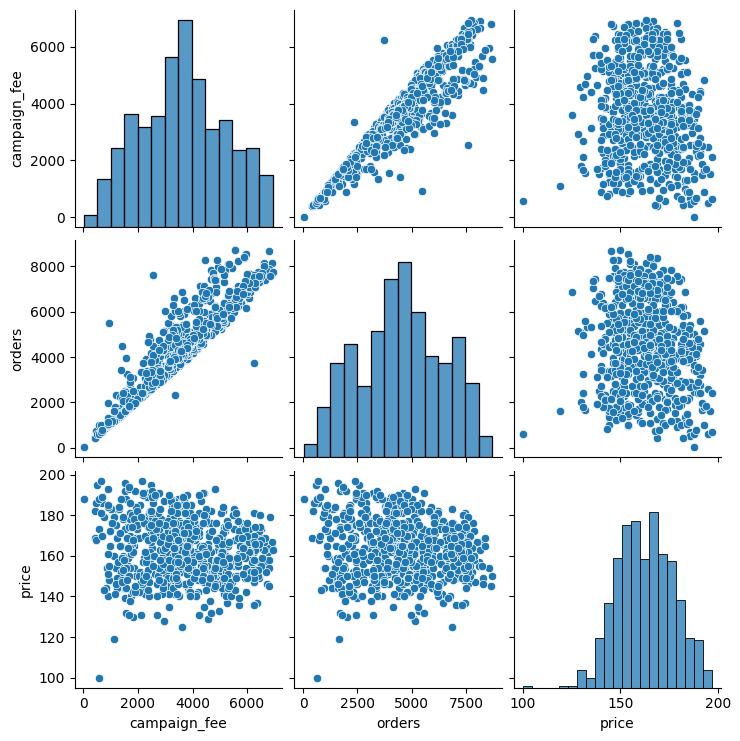

In [15]:
# Multivariate Analysis
# Example: Pairplot of numerical variables
sns.pairplot(df[['campaign_fee', 'orders', 'price']])
plt.show()

# **FINDING CO-RELATION**

---



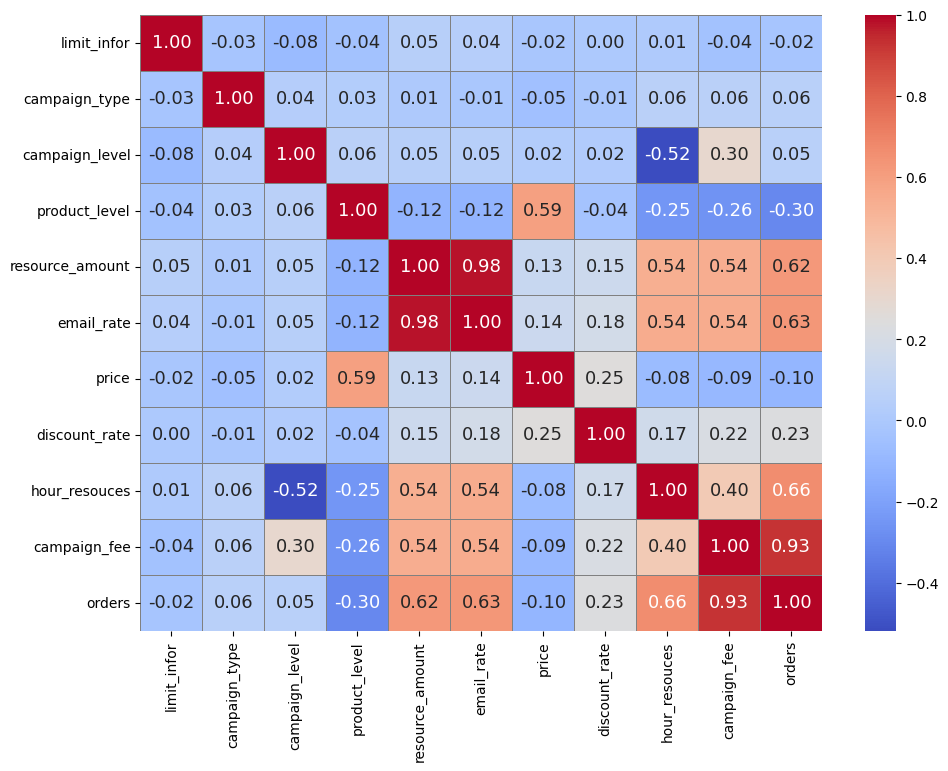

In [16]:
#plotting co-relation chart
plt.figure(figsize=(11, 8))
g=sns.heatmap(df[['limit_infor', 'campaign_type', 'campaign_level', 'product_level',
       'resource_amount','email_rate',  'price','discount_rate',
       'hour_resouces', 'campaign_fee', 'orders']].corr(), annot=True , fmt=".2f", cmap="coolwarm",annot_kws={"size": 13},linewidths=.5,
    linecolor='gray')

### **campaign_fee(0.93) has the most co-relation with orders followed by hour_resources(0.66)and resource_amount(0.62).**

---



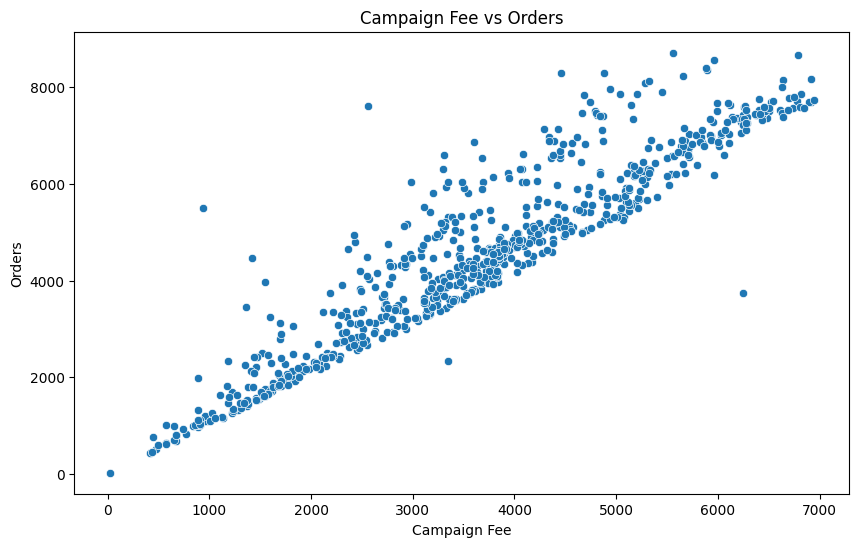

In [17]:
# Visualize relationship between campaign_fee and orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='campaign_fee', y='orders', data=df)
plt.title('Campaign Fee vs Orders')
plt.xlabel('Campaign Fee')
plt.ylabel('Orders')
plt.show()

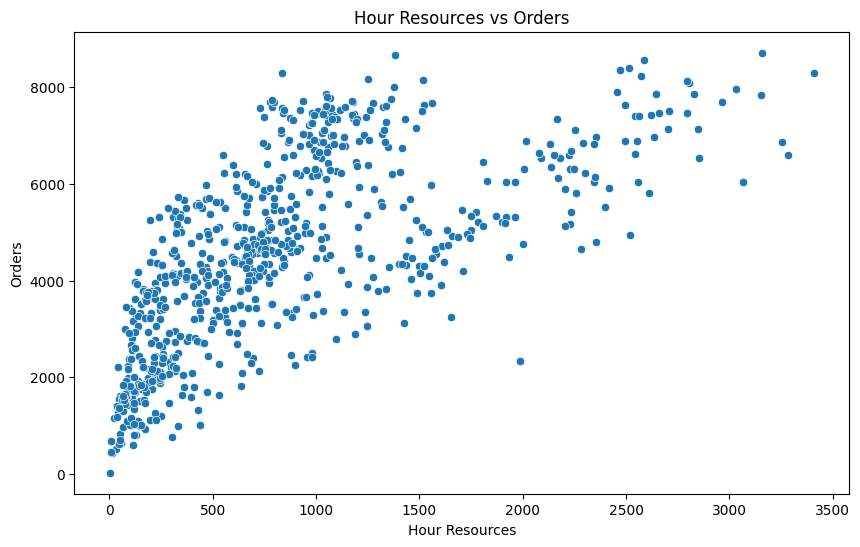

In [18]:
# Visualize relationship between hour_resources and orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour_resouces', y='orders', data=df)
plt.title('Hour Resources vs Orders')
plt.xlabel('Hour Resources')
plt.ylabel('Orders')
plt.show()

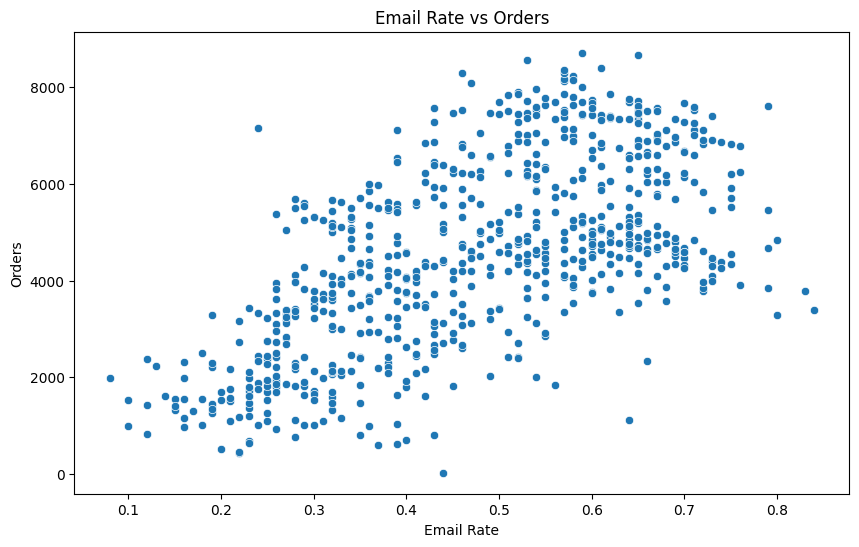

In [19]:

# Visualize relationship between email_rate and orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='email_rate', y='orders', data=df)
plt.title('Email Rate vs Orders')
plt.xlabel('Email Rate')
plt.ylabel('Orders')
plt.show()

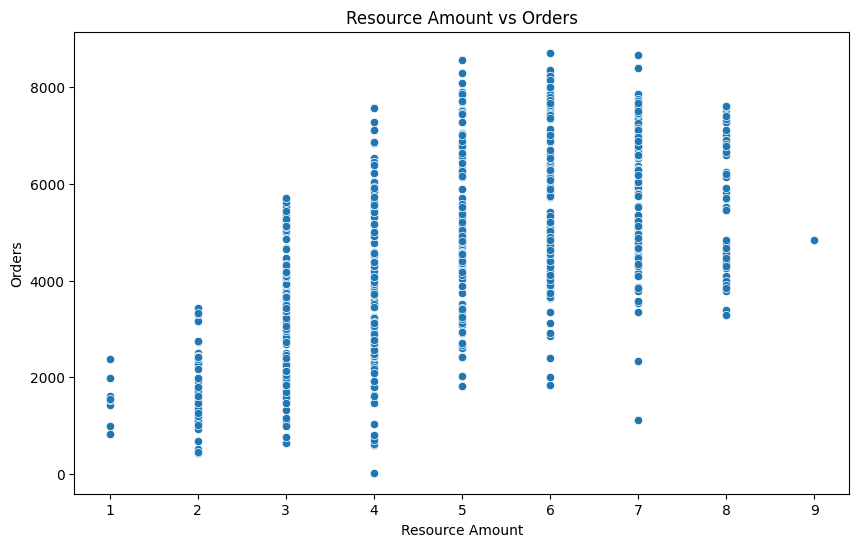

In [20]:
# Visualize relationship between resource_amount and orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='resource_amount', y='orders', data=df)
plt.title('Resource Amount vs Orders')
plt.xlabel('Resource Amount')
plt.ylabel('Orders')
plt.show()

# **PREPROCESSING DATA**

---



In [21]:
X = new_df.drop(columns=['orders'])
y = new_df['orders']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (582, 10) (582,)
Testing set shape: (146, 10) (146,)


# **DEVELOPING THE MODEL**

---



In [24]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
# Support Vector Machine Regressor Model
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

# **EVALUATING THE MODEL**

---



In [27]:
# Linear Regression Model
y_pred_lr = lr_model.predict(X_test)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# accuracy of model
r2_lr = r2_score(y_test, y_pred_lr)
# accuracy of model
print(f'Linear Regression Model: MAE:{mae_lr:.2f}, MSE = {mse_lr:.2f},RMSE={rmse_lr:.2f},R2 = {r2_lr:.2f}')


Linear Regression Model: MAE:88.19, MSE = 124275.61,RMSE=352.53,R2 = 0.96


In [28]:
# Random Forest Regressor Model
y_pred_rf = rf_model.predict(X_test)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)

# accuracy of model
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random forest Regressor Model: MAE={mae_rf:.2f},MSE = {mse_rf:.2f},RMSE={rmse_rf:.2F},R2 = {r2_rf:.2f}')

Random forest Regressor Model: MAE=176.60,MSE = 195803.01,RMSE=442.50,R2 = 0.94


In [29]:
# Support Vector Machine Regressor Model
y_pred_svm = svm_model.predict(X_test)
mae_svm=mean_absolute_error(y_test,y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm=np.sqrt(mse_svm)

# accuracy of model
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM Regressor Model: MAE={mae_svm:.2f},MSE = {mse_svm:.2f},RMSE={rmse_svm:.2F},R2 = {r2_svm:.2f}')

SVM Regressor Model: MAE=1447.12,MSE = 3294012.52,RMSE=1814.94,R2 = 0.07


# **SELECTION OF MODEL**

---



In [30]:
# Select the model with the best performance
if mse_lr < mse_rf and mse_lr < mse_svm :
    best_model = lr_model
    best_mse = mse_lr
    best_rmse = rmse_lr
    best_r2 = r2_lr
    y_pred_best = y_pred_lr
    best_model_name = 'Linear Regression'
elif mse_rf < mse_lr and mse_rf < mse_svm:
    best_model = rf_model
    best_mse = mse_rf
    best_rmse = rmse_rf
    best_r2 = r2_rf
    y_pred_best = y_pred_rf
    best_model_name = 'Random Forest Regressor'
else:
    best_model = svm_model
    best_mse = mse_svm
    best_rmse = rmse_svm
    best_r2 = r2_svm
    y_pred_best = y_pred_svm
    best_model_name = 'SVM Regressor'

print(f'Best Model: {best_model_name}, MSE = {best_mse:.2f},RMSE = {best_rmse:.2f}, R2 = {best_r2:.2f}')

Best Model: Linear Regression, MSE = 124275.61,RMSE = 352.53, R2 = 0.96


In [31]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Create the directory if it does not exist
os.makedirs('./lr_model', exist_ok=True)

# Save the model
joblib.dump(lr_model, './lr_model/products_campaign_sales.joblib')

['./lr_model/products_campaign_sales.joblib']

In [ ]:
app = Flask(__name__)

# Load the model
model_path = './lr_model/products_campaign_sales.joblib'
model = joblib.load(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json()

        # Extract features from the JSON data
        features = np.array(data['features']).reshape(1, -1)

        # Make a prediction
        prediction = model.predict(features)

        # Return the prediction as a JSON response
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
python app.py


In [ ]:
curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"features": [5]}'


# **VISUALIZATIONS**

---



In [ ]:
# Scatter Plot for Model Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, hue=y_pred_best, palette="viridis", edgecolor="purple", s=150)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.title('Campaign Performance Metrics')
plt.show()

#                       **CONCLUSION**


---




Model Development Process:
-------------------------
The dataset was preprocessed by handling missing values, one-hot encoding the categorical variables, and scaling the numerical variables using MinMaxScaler.
Three machine learning models, Linear Regression, Random Forest Regressor, and SVM Regressor, were trained and evaluated.
The model with the best performance was selected based on the mean squared error and R-squared metrics.

Model Performance Evaluation:
-------------------------
The best model i.e RandomForestRegressor achieved a mean squared error of 244978.57 and an R-squared value of 0.94.

Recommendations for Implementation:
-------------------------
The marketing team can use the best model to predict the performance of future product ad campaigns.
The feature importance plot can be used to identify the most effective channels and strategies.
The campaign performance metrics plot can be used to evaluate the effectiveness of the campaigns.

# **THANK YOU**

---





